In [24]:
# Mumbai Indians vs. Delhi Capitals
# No. Data: 2,000 (1,000 each)
# Subjectivity: Mumbai Indians (0.129) < DC (0.259); People talk objectively on Mumbai Indians more than DC's.
# Polarity: Mumbai Indians (0.065) < DC (0.098); People has better perspectives on DC than Mumbai Indians's.
# Popularity: Mumbai Indians (58.41) > DC (55.59); DC has less popularity than Mumbai Indians's.

In [3]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime

%matplotlib inline

In [11]:
col = pymongo.MongoClient()["DSA201"]["Mumbai Indians"]
col.count()

C:\Users\PornpatSamartlertdee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


1000

In [12]:
col.find_one()

{'_id': ObjectId('5f9fe705f5ac5b22247a50a1'),
 'created_at': 'Mon Nov 02 11:01:19 +0000 2020',
 'id': 1323218628313980929,
 'id_str': '1323218628313980929',
 'text': 'RT @Paramanand772k: All Seven IPL teams watching Mumbai Indians and saying :- 😷 https://t.co/qZE6wguwk2',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1265283661848551425,
  'id_str': '1265283661848551425',
  'name': 'sexysundari👅',
  'screen_name': 'tweetshivani_',
  'location': 'Indore, India',
  'url': None,
  'description': 'चाय के साथ कलम क्या माल लगती हैं✍️👄',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 9293,
  'friends_count': 1397,
  'listed_count': 6,
  'favourites_count': 32560,
  'statuses_count': 42100,
  'cre

In [13]:
mumbaiindians_dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

mumbaiindians_dataset = pd.DataFrame(mumbaiindians_dataset)
#from googletrans import Translator
#translator=Translator()
#trump_dataset.text=translator.translate(dataset.text)
mumbaiindians_dataset

,created_at,text,user,source,lang
0,Mon Nov 02 11:01:19 +0000 2020,RT @Paramanand772k: All Seven IPL teams watchi...,@tweetshivani_,"<a href=""http://twitter.com/download/android"" ...",en
1,Mon Nov 02 11:02:12 +0000 2020,Scenario 6\n\nGame 1: Royal Challengers beat D...,@aacespdl,"<a href=""http://twitter.com/download/android"" ...",en
2,Mon Nov 02 11:02:24 +0000 2020,Big game in the IPL today 🤩 A place in the pla...,@Sportskeeda,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
3,Mon Nov 02 11:03:27 +0000 2020,ipl 2020 sunrisers hyderabad vs mumbai indians...,@RaghavS49394362,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",en
4,Mon Nov 02 11:04:13 +0000 2020,@DuflingDuck @abhiandniyu @mipaltan @RCBTweets...,@AnishMore10,"<a href=""http://twitter.com/download/android"" ...",tl
...,...,...,...,...,...
995,Mon Nov 02 13:15:46 +0000 2020,RT @mipaltan: Just a few friends catching up 😉...,@Swapnil38684129,"<a href=""http://twitter.com/download/iphone"" r...",en
996,Mon Nov 02 13:15:47 +0000 2020,RT @mipaltan: 📹| Ro turns back the clock and t...,@saikish0143,"<a href=""http://twitter.com/download/android"" ...",en
997,Mon Nov 02 13:15:48 +0000 2020,Busco quién haga match de GIFS de Dune conmigo...,@Singuilla2,"<a href=""https://mobile.twitter.com"" rel=""nofo...",es
998,Mon Nov 02 13:15:51 +0000 2020,RT @Hitmann451: @ImRo45 is fit \nNothing to wo...,@Lazy_Elegance_,"<a href=""http://twitter.com/download/android"" ...",en


In [14]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(mumbaiindians_dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,the,812
1,rt,794
2,in,758
3,https,665
4,mipaltan,659
5,co,656
6,mi,636
7,onefamily,609
8,mumbaiindians,571
9,ro,541


twittbot.net                 1
TweetCaster for Android      1
Twitter Media Studio         1
IFTTT                        2
TweetDeck                    4
WordPress.com                4
Tweet Good                   7
Twitter for iPhone          48
Twitter Web App             88
Twitter for Android        842
Name: source, dtype: int64

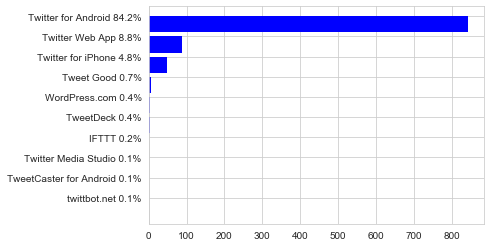

In [63]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
mumbaiindians_dataset.source_name = mumbaiindians_dataset.source.apply(get_source_name)

source_counts = mumbaiindians_dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(mumbaiindians_dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

mr       2
tr       3
fr       3
tl       6
es       6
in       6
hi      13
et      15
und     45
en     898
Name: lang, dtype: int64

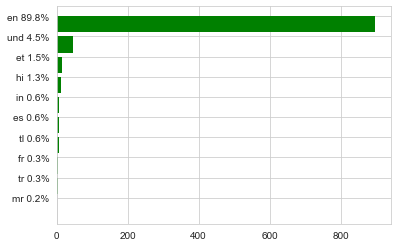

In [64]:
lang_counts = mumbaiindians_dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(mumbaiindians_dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [17]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from  textblob import TextBlob

In [22]:
mumbaiindians_dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

mumbaiindians_dataset1 = pd.DataFrame(mumbaiindians_dataset1)

is_mumbaiindians_dataset1=mumbaiindians_dataset1.lang=="en"
mumbaiindians_dataset1=mumbaiindians_dataset1[is_mumbaiindians_dataset1]
mumbaiindians_dataset1

,id,text,lang
0,1323218628313980929,RT @Paramanand772k: All Seven IPL teams watchi...,en
1,1323218850662375425,Scenario 6\n\nGame 1: Royal Challengers beat D...,en
2,1323218900415258625,Big game in the IPL today 🤩 A place in the pla...,en
3,1323219161737240576,ipl 2020 sunrisers hyderabad vs mumbai indians...,en
5,1323219437948792833,Wonder what happens when the game gets called ...,en
...,...,...,...
994,1323252450313211905,#NewProfliePic \nGonna use these glasses to w...,en
995,1323252463663603715,RT @mipaltan: Just a few friends catching up 😉...,en
996,1323252464502501377,RT @mipaltan: 📹| Ro turns back the clock and t...,en
998,1323252485314600960,RT @Hitmann451: @ImRo45 is fit \nNothing to wo...,en


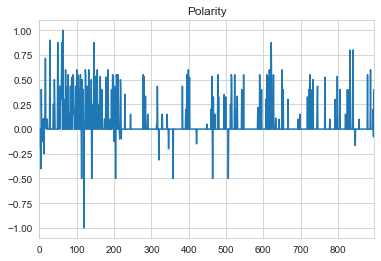

In [33]:
tweettext=mumbaiindians_dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

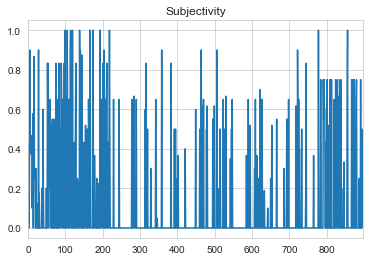

In [34]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [35]:
import statistics
statistics.mean(poltweet.polarity)

0.06512249443207127

In [36]:
import statistics
statistics.mean(poltweet.subjectivity)

0.12948699932831337

In [37]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [38]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = mumbaiindians_dataset1['text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
nltk.download('stopwords')
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PornpatSamartlertdee\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


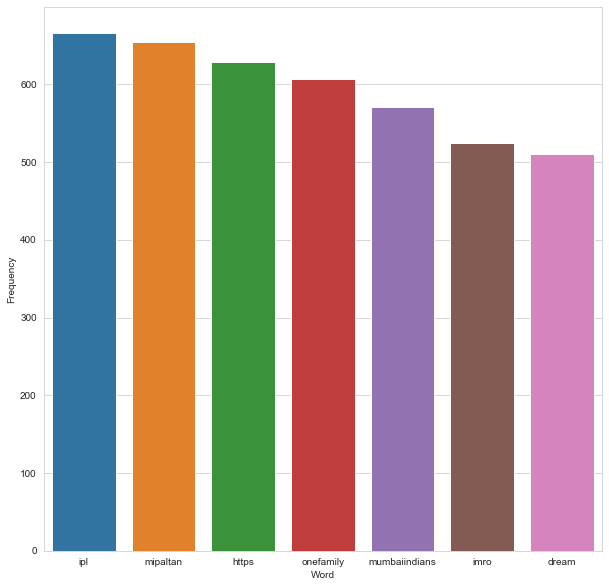

In [39]:
import seaborn as sns
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

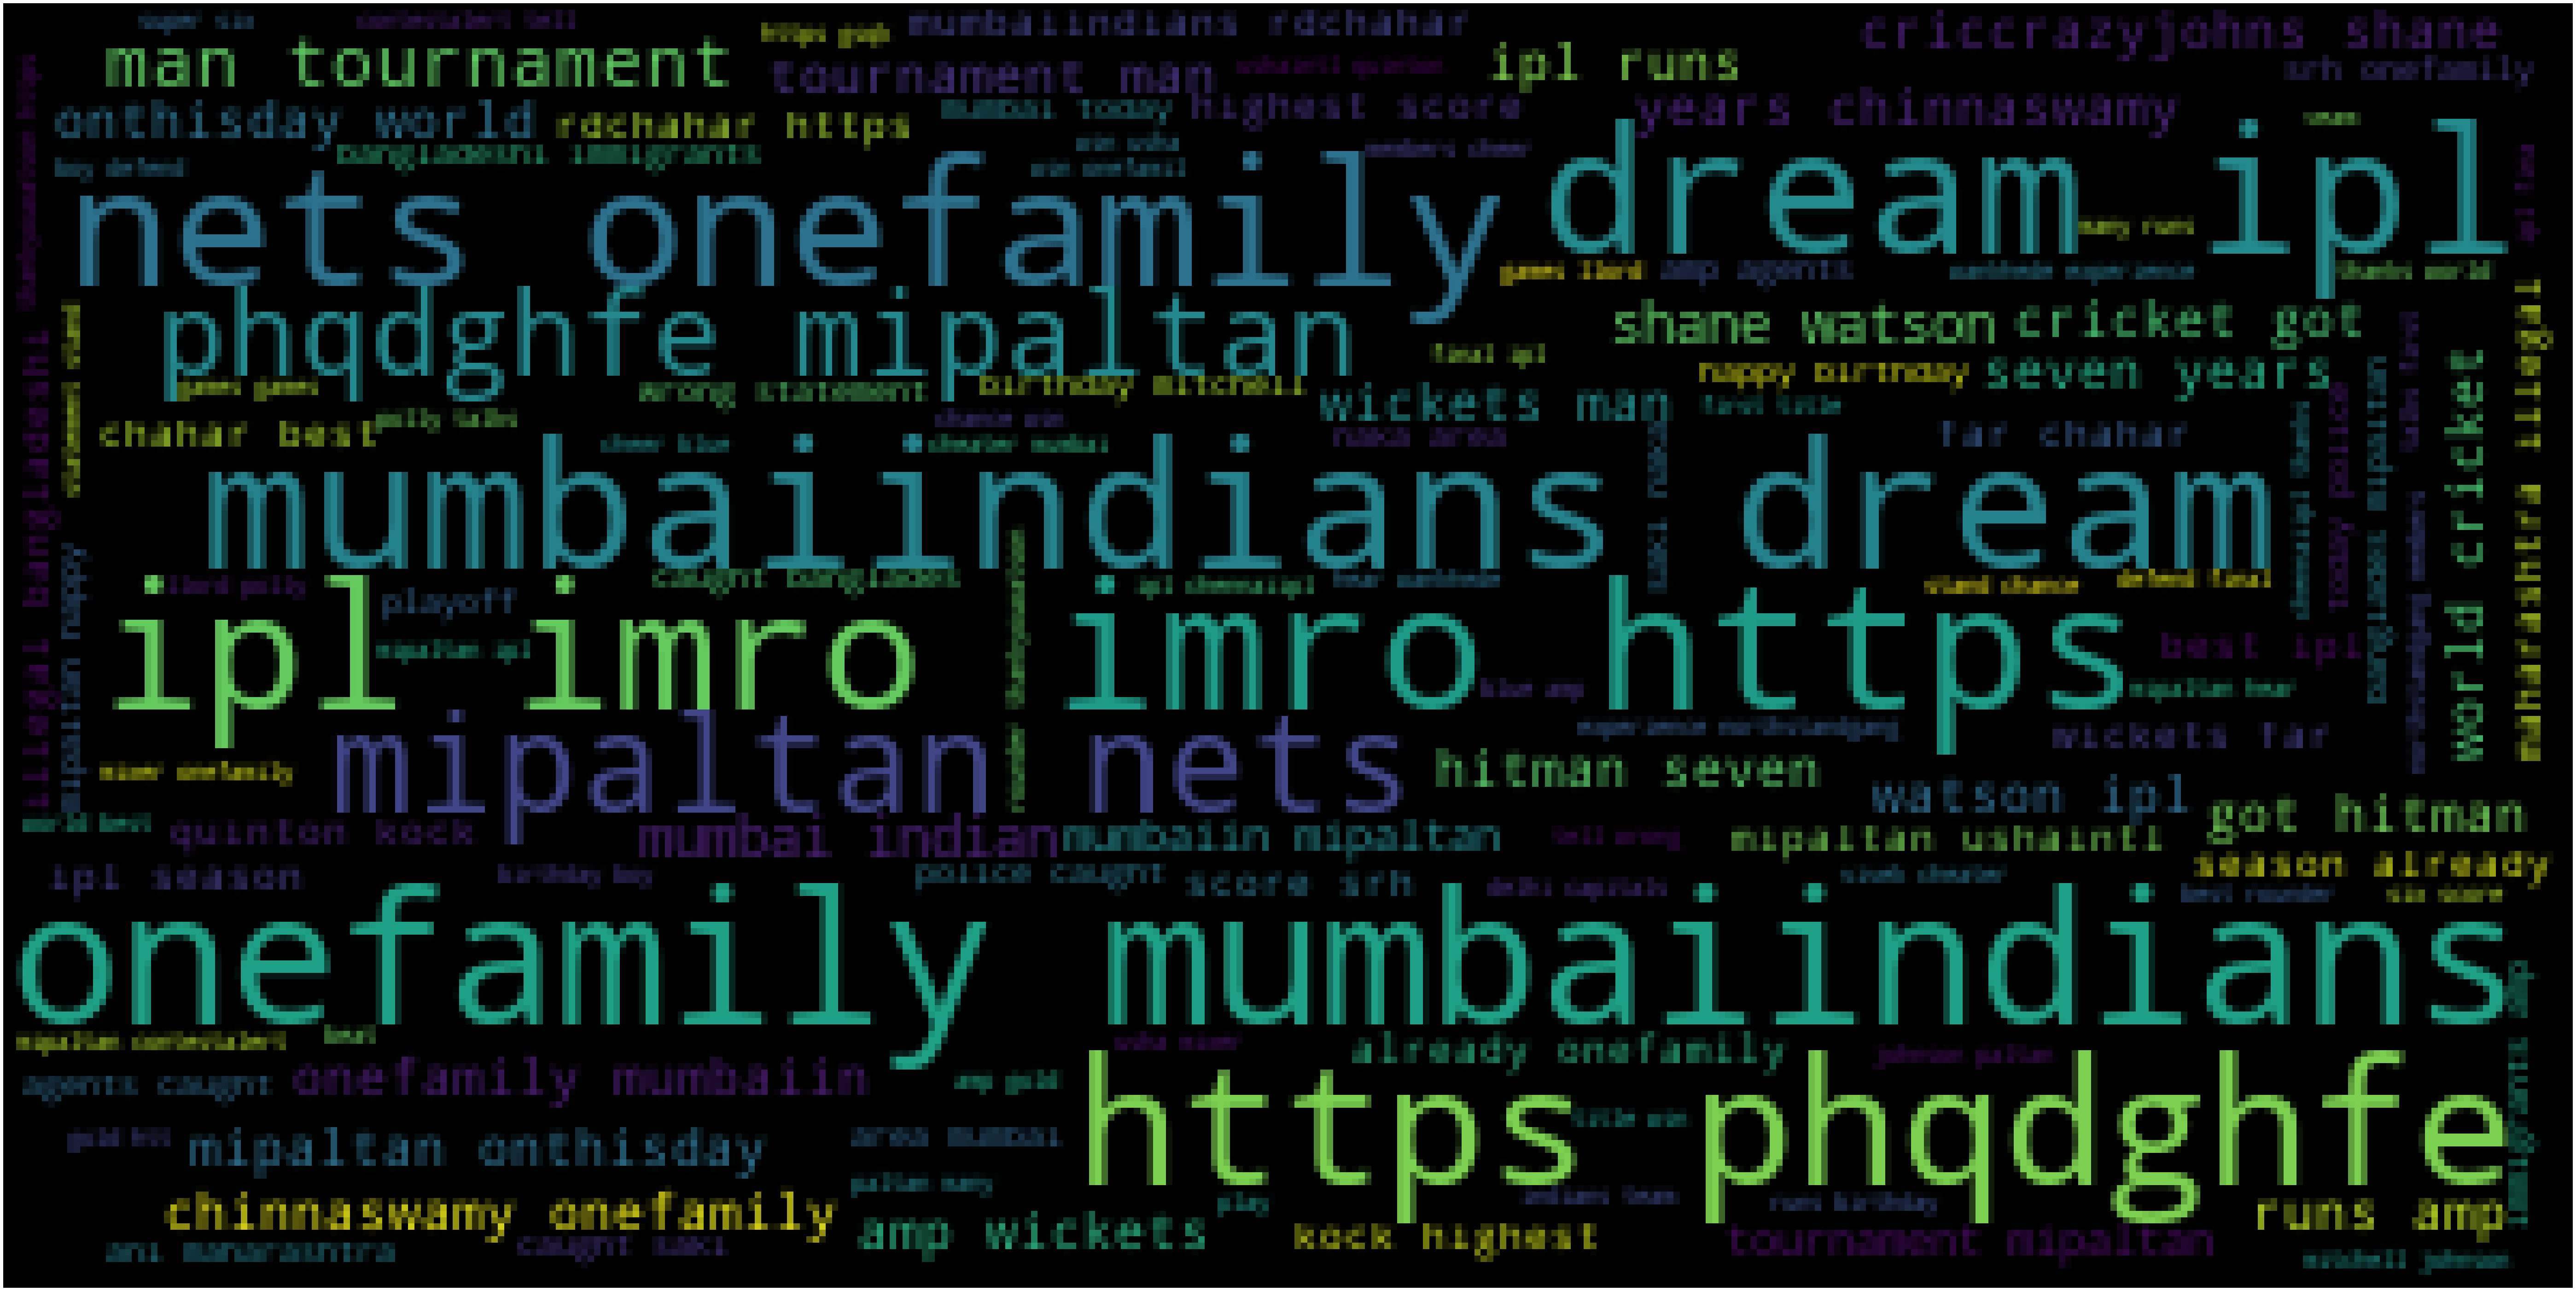

In [40]:
wc(cleaned_data_title,'black','Common Words' )

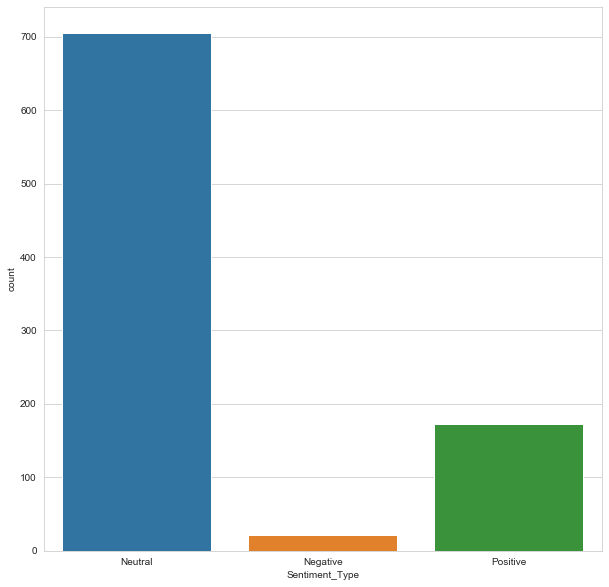

In [41]:
from textblob import TextBlob

bloblist_desc = list()

twit=mumbaiindians_dataset1['text'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)

In [42]:
import collections, numpy as np
a=twit_polarity_desc.Sentiment_Type
neut=np.count_nonzero(a == 'Neutral')
pos=np.count_nonzero(a == 'Positive')
neg=np.count_nonzero(a == 'Negative')
popularity='{0:.2f}'.format((((neut*0.5)+(pos)+(neg*0))/(neut+pos+neg))*100)
popularity

'58.41'

In [43]:
#Kolkata Knights Riders

In [6]:
col = pymongo.MongoClient()["DSA201"]["Delhi Capitals"]
col.count()

C:\Users\PornpatSamartlertdee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


1000

In [7]:
col.find_one()

{'_id': ObjectId('5f9ffcfeac94a442e0341552'),
 'created_at': 'Mon Nov 02 12:35:05 +0000 2020',
 'id': 1323242224805556224,
 'id_str': '1323242224805556224',
 'text': 'RT @aajtak: #IPL: लगातार चार मैच हारने वाले #DelhiCapitals का आज है, लगातार तीन मैच हारने वाली #RoyalChallengersBangalore से मुकाबला। आज जो…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 919431446208561153,
  'id_str': '919431446208561153',
  'name': 'Nishant Jadon',
  'screen_name': 'NishantJadon3',
  'location': 'भारत',
  'url': None,
  'description': '#Risky_Chokra',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 17,
  'friends_count': 25,
  'listed_count': 0,
  'favourites_count': 840,
  'statuses_count': 609,
  'create

In [8]:
DC_dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

DC_dataset = pd.DataFrame(DC_dataset)
#from googletrans import Translator
#translator=Translator()
#DC_dataset.text=translator.translate(dataset.text)
DC_dataset

,created_at,text,user,source,lang
0,Mon Nov 02 12:35:05 +0000 2020,RT @aajtak: #IPL: लगातार चार मैच हारने वाले #D...,@NishantJadon3,"<a href=""http://twitter.com/download/android"" ...",hi
1,Mon Nov 02 12:35:11 +0000 2020,RT @Al_Abhilash2244: Guys...\nDelhi Capitals v...,@ViratVickyv18,"<a href=""http://twitter.com/download/android"" ...",und
2,Mon Nov 02 12:35:27 +0000 2020,RT @RajkummarRao: Who will take a #Chhalaang t...,@ArghoMondal_,"<a href=""http://twitter.com/download/android"" ...",en
3,Mon Nov 02 12:35:29 +0000 2020,@TheJSWGroup @DelhiCapitals Karcham Wangtoo Hy...,@nayaksch,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
4,Mon Nov 02 12:35:47 +0000 2020,@Dream11 @IPL @DelhiCapitals @SDhawan25 @ABdeV...,@RAVIROGER44,"<a href=""https://mobile.twitter.com"" rel=""nofo...",hi
...,...,...,...,...,...
995,Mon Nov 02 13:29:09 +0000 2020,Eroju #DelhiCapitals and #RCB e team odipoyina...,@ManoharReddiii,"<a href=""http://twitter.com/download/android"" ...",tl
996,Mon Nov 02 13:29:09 +0000 2020,Middle Muddle...\n\n#DCvRCB #IPL2020 #Dream11I...,@YahooCricket,"<a href=""http://twitter.com/download/android"" ...",en
997,Mon Nov 02 13:29:13 +0000 2020,@jswsteel @DelhiCapitals Shikhar Dhawan \n\n#K...,@shah_himanshu,"<a href=""http://twitter.com/download/android"" ...",hi
998,Mon Nov 02 13:29:15 +0000 2020,RT @CricCrazyJohns: Shane Watson in IPL:\n\n- ...,@ThalapathyJohn1,"<a href=""http://twitter.com/download/android"" ...",en


In [9]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(DC_dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,delhicapitals,619
1,https,513
2,co,503
3,the,454
4,rt,401
5,ipl,304
6,rcb,270
7,in,254
8,for,248
9,to,204


C:\Users\PornpatSamartlertdee\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


Twitter Media Studio      3
IFTTT                     3
Twitter for iPad          6
Tweet Good                8
Plume for Android         9
TweetDeck                28
WordPress.com            40
Twitter for iPhone       57
Twitter Web App         148
Twitter for Android     681
Name: source, dtype: int64

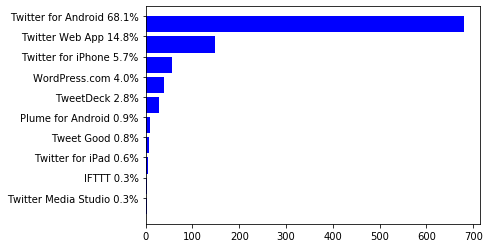

In [10]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
DC_dataset.source_name = DC_dataset.source.apply(get_source_name)

source_counts = DC_dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(DC_dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

tr       8
tl      10
ht      11
et      13
fr      13
ca      13
in      30
hi      72
und     76
en     715
Name: lang, dtype: int64

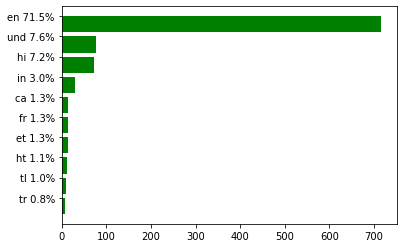

In [11]:
lang_counts = DC_dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(DC_dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [12]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from  textblob import TextBlob

In [13]:
DC_dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

DC_dataset1 = pd.DataFrame(DC_dataset1)

is_DC_dataset1=DC_dataset1.lang=="en"
DC_dataset1=DC_dataset1[is_DC_dataset1]
DC_dataset1

,id,text,lang
2,1323242316857970688,RT @RajkummarRao: Who will take a #Chhalaang t...,en
3,1323242323778498560,@TheJSWGroup @DelhiCapitals Karcham Wangtoo Hy...,en
5,1323242402035994625,"Live IPL Score, DC vs RCB Live Cricket Score: ...",en
6,1323242411083124739,"Live IPL Score, DC vs RCB Live Cricket Score: ...",en
7,1323242437985280000,#DCvRCB | #IPL2020\n\nHowdy one and all!\n\nWe...,en
...,...,...,...
992,1323255796520513536,@SunRisers @MohammadNabi007 See who is doing c...,en
994,1323255824689500160,Match 55 : Delhi vs Bangalore live previews\nh...,en
996,1323255832146923520,Middle Muddle...\n\n#DCvRCB #IPL2020 #Dream11I...,en
998,1323255855970611200,RT @CricCrazyJohns: Shane Watson in IPL:\n\n- ...,en


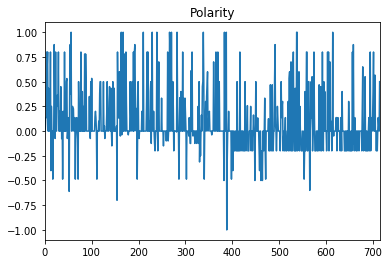

In [14]:
tweettext=DC_dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

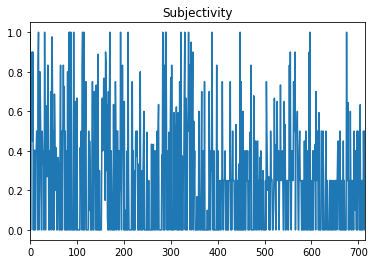

In [15]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [16]:
import statistics
statistics.mean(poltweet.polarity)

0.09798018079798018

In [17]:
import statistics
statistics.mean(poltweet.subjectivity)

0.25920247293499044

In [18]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [19]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = DC_dataset1['text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
nltk.download('stopwords')
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PornpatSamartlertdee\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


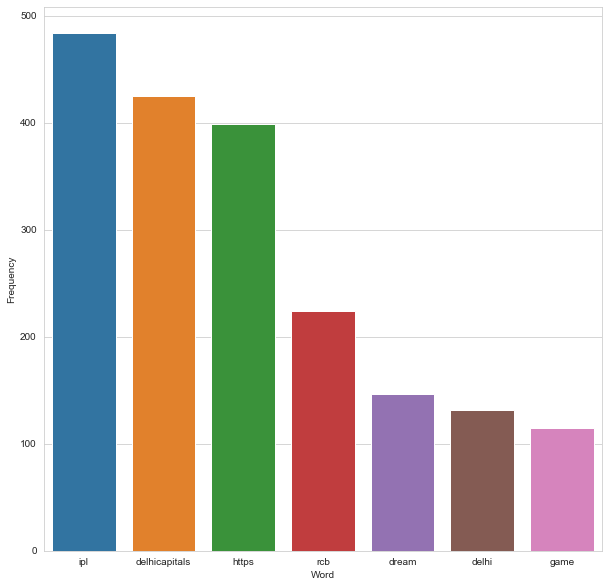

In [20]:
import seaborn as sns
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

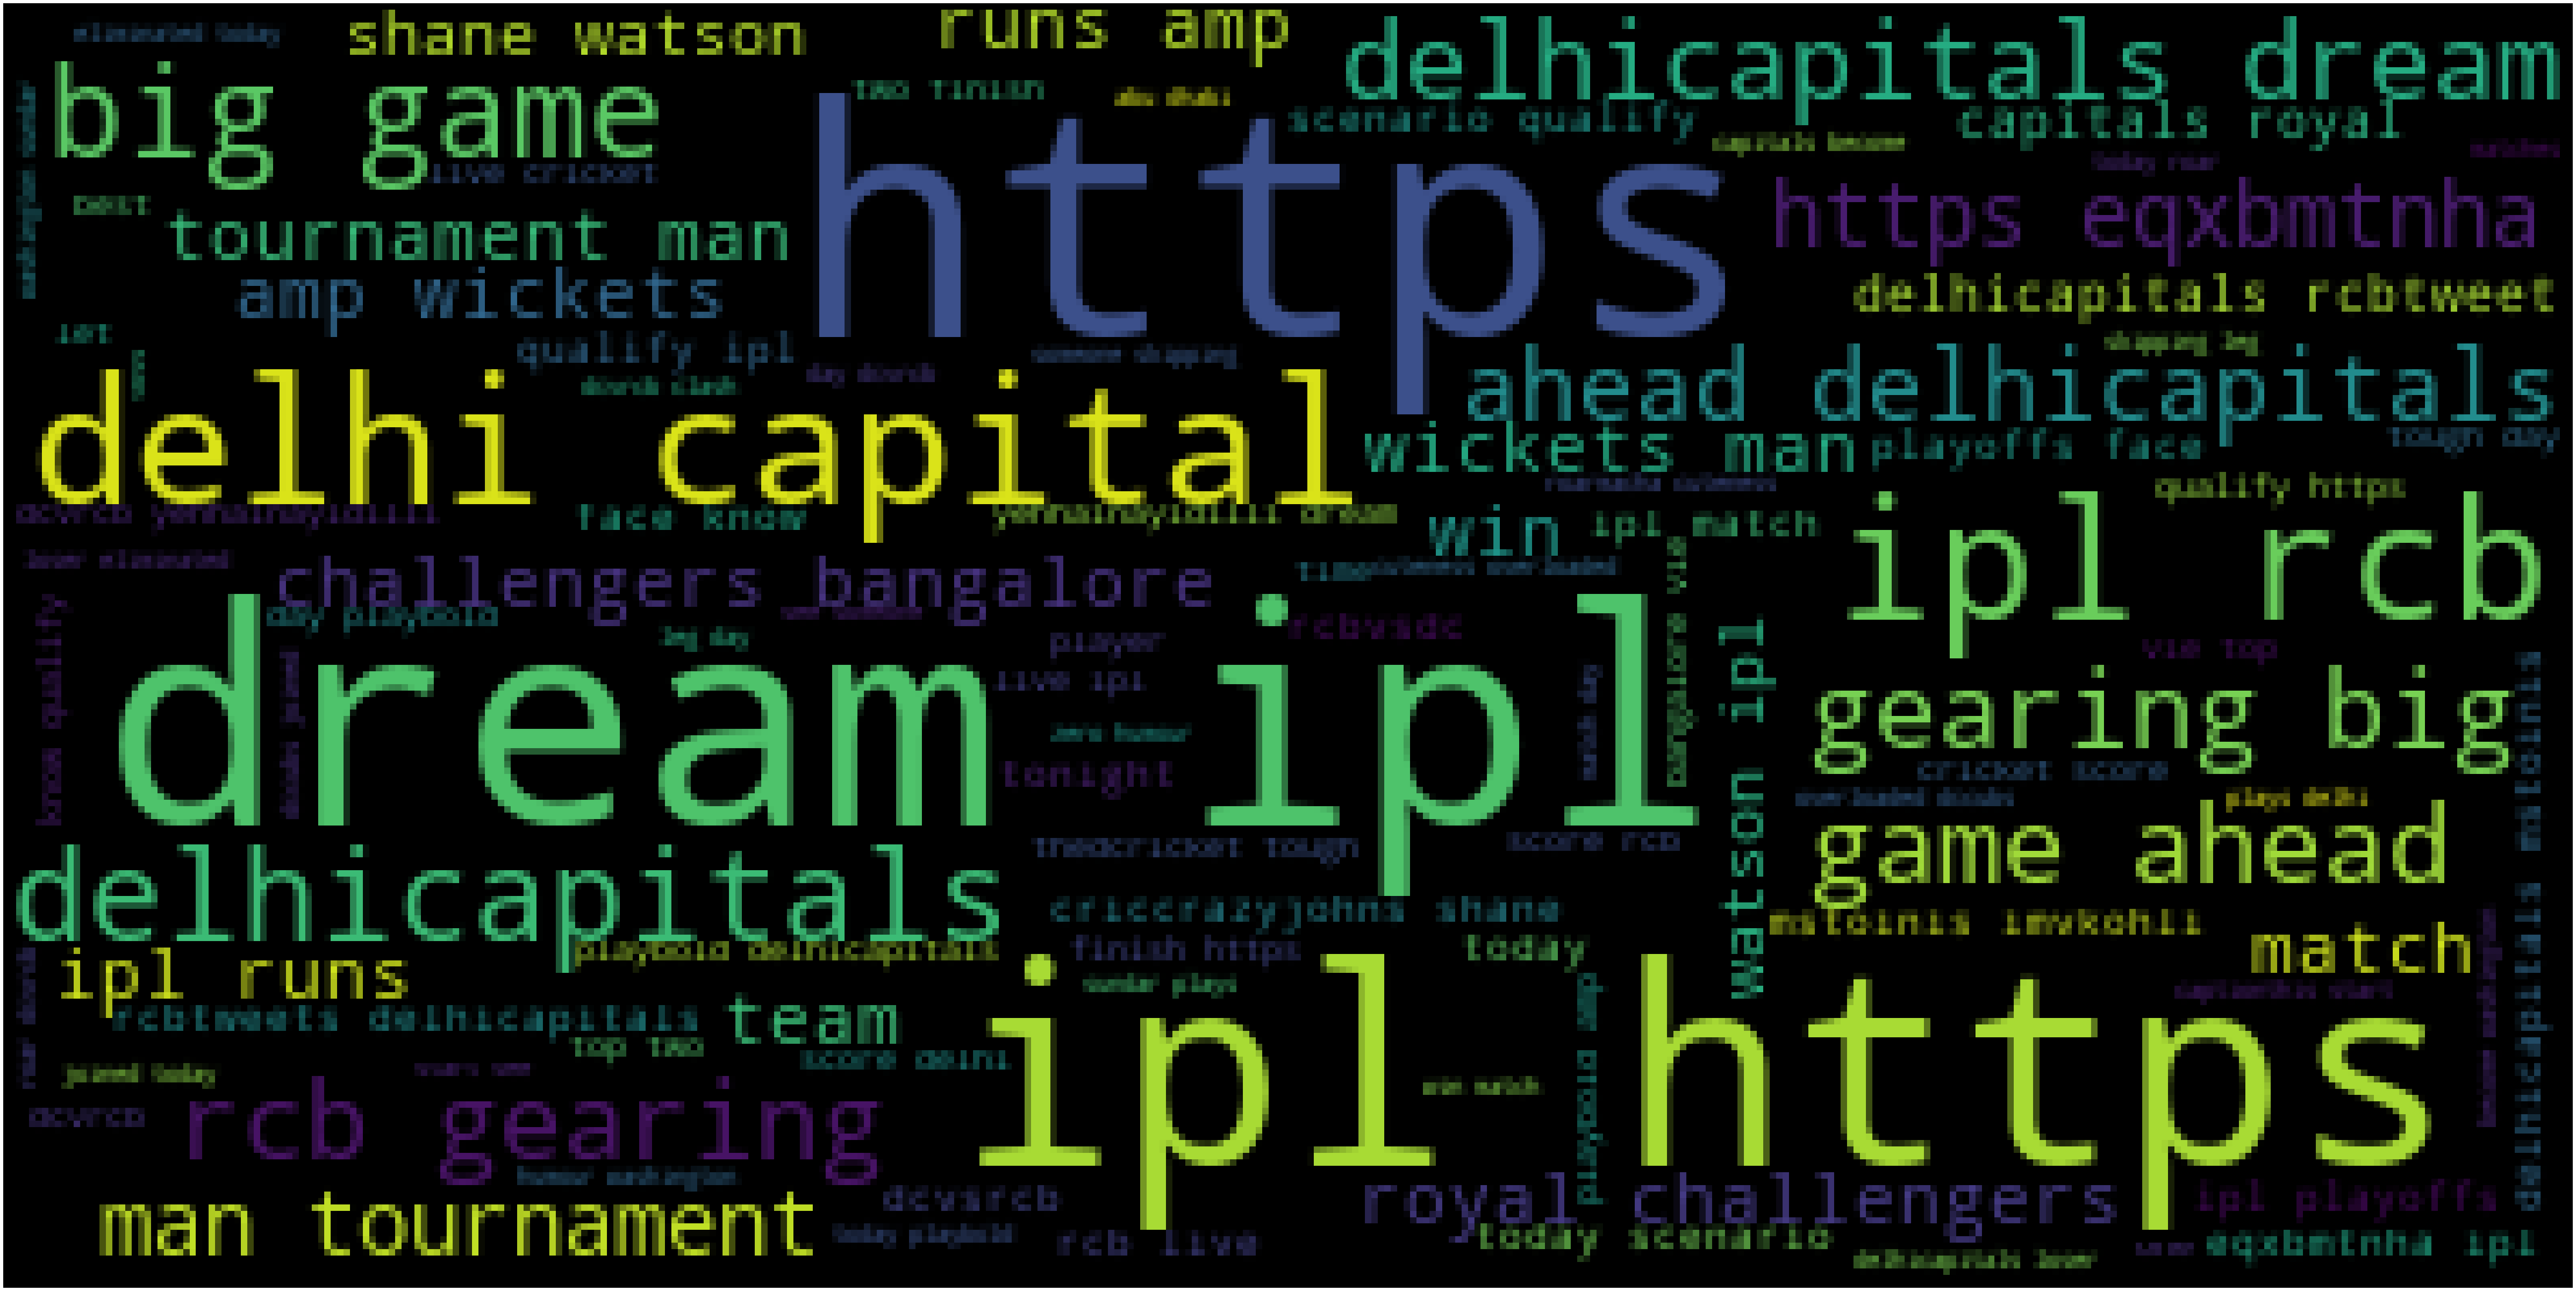

In [21]:
wc(cleaned_data_title,'black','Common Words' )

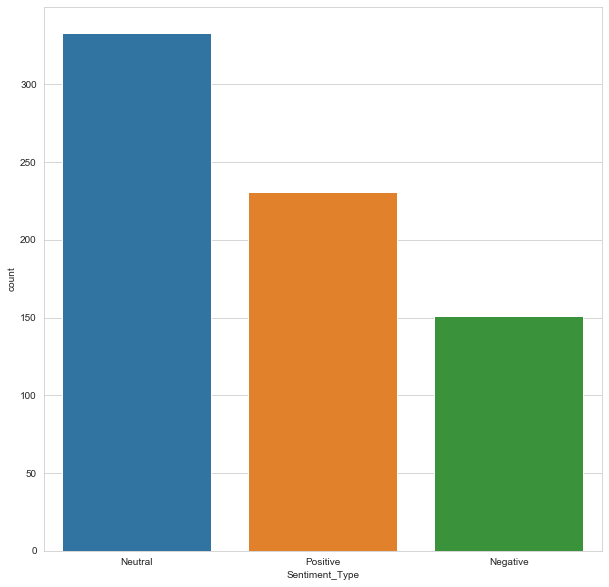

In [22]:
from textblob import TextBlob

bloblist_desc = list()

twit=DC_dataset1['text'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)

In [23]:
import collections, numpy as np
a=twit_polarity_desc.Sentiment_Type
neut=np.count_nonzero(a == 'Neutral')
pos=np.count_nonzero(a == 'Positive')
neg=np.count_nonzero(a == 'Negative')
popularity='{0:.2f}'.format((((neut*0.5)+(pos)+(neg*0))/(neut+pos+neg))*100)
popularity

'55.59'